In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def g(x, mu, sigma): return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x - mu)**2/2/sigma**2)

In [3]:
t = np.linspace(-1, 1)

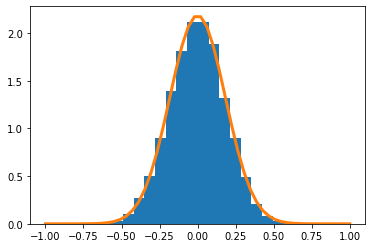

In [16]:
sample_means = []
for _ in range(10000):
    X = np.random.normal(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 0, 1/np.sqrt(30)), lw=3)

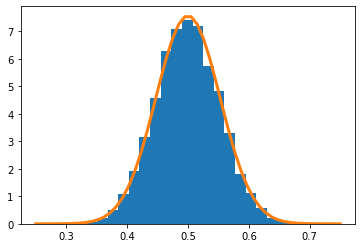

In [20]:
t = np.linspace(0.25, 0.75)
sample_means = []
for _ in range(10000):
    X = np.random.uniform(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 0.5, 1/np.sqrt(12*30)), lw=3)

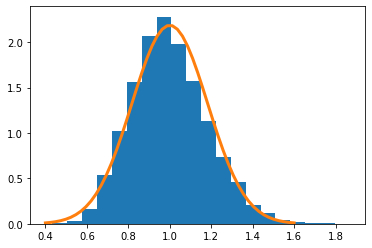

In [22]:
t = np.linspace(0.4, 1.6)
sample_means = []
for _ in range(10000):
    X = np.random.exponential(size=30)
    sample_means.append(X.mean())
sample_means = np.array(sample_means)

plt.hist(sample_means, bins=20, density=True);
plt.plot(t, g(t, 1, 1/np.sqrt(30)), lw=3)

In [23]:
X = np.array([1, 2, 2, 3, 4, 5])

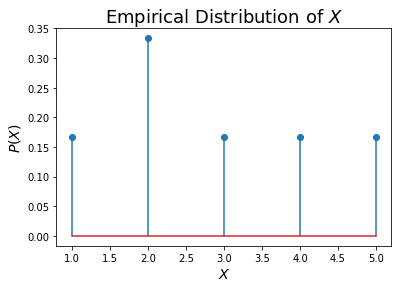

In [31]:
P = np.array([1/6, 2/6, 1/6, 1/6, 1/6])
plt.stem(np.unique(X), P, use_line_collection=True)
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$P(X)$", fontsize=14)
plt.title("Empirical Distribution of $X$", fontsize=18);

In [86]:
X = np.random.normal(size=100)
m = X.mean()
bootstrap_means = []
for _ in range(10000):
    XB = np.random.choice(X, size=100)
    bootstrap_means.append(XB.mean())
bootstrap_means = np.array(bootstrap_means)

In [87]:
np.std(bootstrap_means) # standard error of the sample mean

0.10220765193132313

In [92]:
len([i for i in range(100) if X[i] in XB])/100

0.6

In [93]:
1 - 1/np.exp(1)

0.6321205588285577

<StemContainer object of 3 artists>

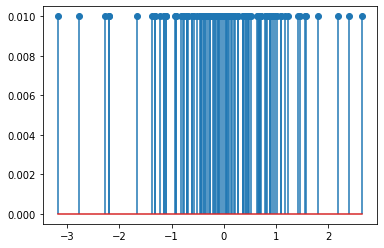

In [96]:
plt.stem(X, np.ones_like(X)/len(X), use_line_collection=True)

Kernel density estimation:

$$
\frac1{nh}\sum_i K\left(\frac{X - X_i}h\right)
$$

In [98]:
from sklearn.neighbors import KernelDensity

In [100]:
M = KernelDensity(bandwidth=0.05)

$$
y = b_0 + b_1*X + \epsilon,\qquad \epsilon\sim N(0,\sigma^2)
$$
$$
\widehat{\sigma}^2 = \frac{RSS}{n-2}
$$


In [108]:
n = 100
b0 = 1
b1 = -0.5

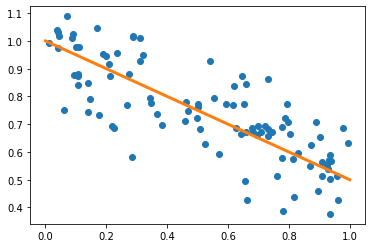

In [110]:
X = np.random.uniform(size=100)
e = np.random.normal(0, 0.1, size=n)
y = b0 + b1*X + e
plt.plot(X, y, 'o')
plt.plot([0, 1], [1, 0.5], lw=3)

In [116]:
# Pretend we just know (X, y)
from sklearn.linear_model import LinearRegression

b0B = []
b1B = []
for _ in range(10000):
    I = np.random.choice(n, size=n)
    XB = X[I]
    yB = y[I]
    M = LinearRegression()
    M.fit(XB.reshape(-1, 1), yB)
    b0B.append(M.intercept_)
    b1B.append(M.coef_[0])

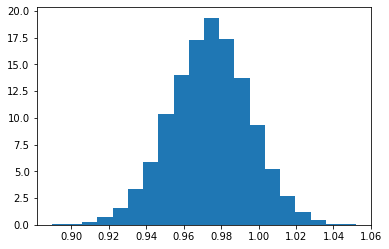

In [117]:
plt.hist(b0B, bins=20, density=True);

In [120]:
print(np.std(b0B)) # bootstrap estimate of standard error for b0hat
print(np.std(b1B)) # bootstrap estimate of standard error for b1hat

0.021198064256162077
0.03340544767866972


In [134]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [165]:
X, y = load_breast_cancer(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, shuffle=True, test_size=0.2)

In [166]:
Ms = []
for _ in range(100):
    I = np.random.choice(len(X_tr), size=len(X_tr))
    J = [i for i in range(len(X_tr)) if i not in I]
    X_tr_B = X[I]
    y_tr_B = y[I]
    M = DecisionTreeClassifier()
    M.fit(X_tr_B, y_tr_B)
    Ms.append(M)

In [167]:
Ms[0].predict(X_te)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1])

In [169]:
Ms[1].predict(X_te)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1])

In [170]:
Ms[2].predict(X_te)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1])

In [171]:
y_pr = np.array([M.predict(X_te) for M in Ms])

In [175]:
y_ens_pr = 1*(y_pr.sum(axis=0) > 50)

In [176]:
accuracy_score(y_te, y_ens_pr)

1.0

In [214]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier

In [184]:
M = VotingClassifier([(str(i), DecisionTreeClassifier()) for i in range(100)])

In [187]:
M.fit(X_tr, y_tr);
y_pr = M.predict(X_te)

In [188]:
accuracy_score(y_te, y_pr)

0.9473684210526315

BAGGING = Bootstrap AGGregatING

In [211]:
M = BaggingClassifier(DecisionTreeClassifier(),
                      oob_score=True,
                      n_estimators=500,
                      max_features=5)

In [212]:
M.fit(X, y)
print(M.oob_score_)
D = M.oob_decision_function_

0.961335676625659


In [206]:
D[:10, :].sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [239]:
M = RandomForestClassifier(n_estimators=5, max_features=5, oob_score=True)
M.fit(X, y)
M.oob_score_
i = M.feature_importances_.argsort()

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


<BarContainer object of 30 artists>

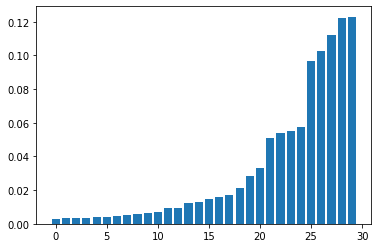

In [227]:
plt.bar(range(30), M.feature_importances_[i])

In [229]:
A = []
for _ in range(100):
    I = np.random.choice(30, size=5)
    A = A + list(I)

In [233]:
counts = [len([i for i in range(500) if A[i] == j]) for j in range(30)]

In [235]:
max(counts)

25

In [237]:
(29/30)**5

0.0

In [241]:
from sklearn.datasets import fetch_openml

In [258]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [281]:
X_tr = X[:500, :]
y_tr = y[:500]

In [282]:
X_te = X[500:1000, :]
y_te = y[500:1000]

In [276]:
M = DecisionTreeClassifier()
M.fit(X_tr[:, I], y_tr)
y_pr = M.predict(X_te[:,I])
accuracy_score(y_te, y_pr)

0.546

In [291]:
M = RandomForestClassifier(n_estimators=1000, max_features=20, oob_score=True)
M.fit(X_tr[:,I], y_tr)
y_pr = M.predict(X_te[:,I])
accuracy_score(y_te, y_pr)

0.794

In [290]:
I = M.feature_importances_.argsort()[-100:]

<BarContainer object of 100 artists>

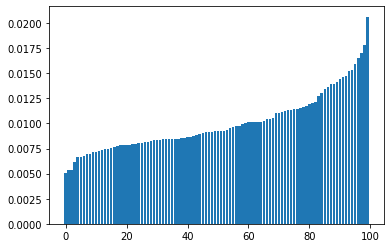

In [295]:
I = M.feature_importances_.argsort()
plt.bar(range(100), M.feature_importances_[I])

In [294]:
len(I)

100